In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import matplotlib.pyplot as plt
from campaign_analysis import *
%matplotlib inline
import seaborn as sns
from db_utils import get_hive_timespan, query_hive_ssh
from conversion_analysis import get_conversion_clicks, plot_conversion_rate

## Set-Up Code

In [2]:
start = '2015-07-01 00:00'
stop = '2015-08-05 23:00'

dsk_campaign = 'C1516_enJP_dsk_hi_FR'
mob_campaign = 'C1516_enJP_mob_hi_FR'
ipd_campaign = 'C1516_enJP_ipd_hi_FR'

country_code = 'JP'
project = 'en.wikipedia'

all_regs, device_regs, size_regs, dsk_regs,mob_regs, ipd_regs, lg_regs, sm_regs  = get_regs(dsk_campaign, mob_campaign, ipd_campaign)


In [4]:
# fetch data
click = get_clicks(start, stop)
don = get_donations(start, stop)
imp = get_impressions(start, stop)
pv = get_pageviews(start, stop, country_code, project)

# Pageviews vs. Impression by device

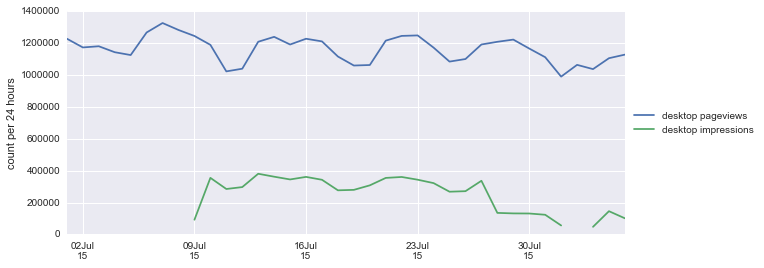

In [6]:
plot_traffic(pv, imp, 'desktop', device_regs['Desktop'], start, stop, hours = 24)

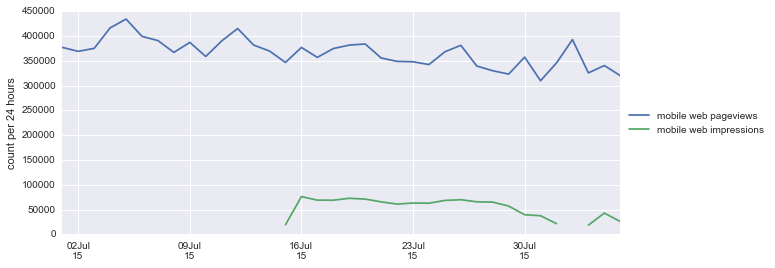

In [7]:
plot_traffic(pv, imp, 'mobile web', device_regs['Mobile'], start, stop, hours = 24)

## Impressions: Large vs Small By Device  

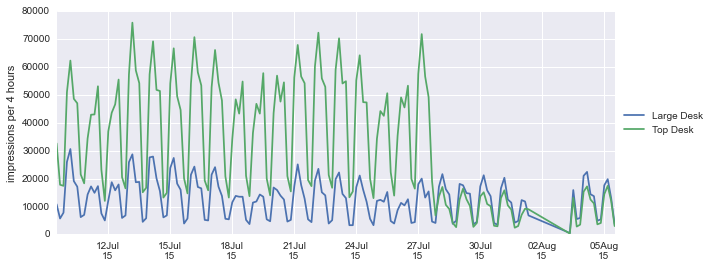

In [8]:
hours = 4
config = {
            'hours' :hours, 
            'ylabel': 'impressions per %d hours' % hours
}

plot_by_time(imp, dsk_regs, **config )


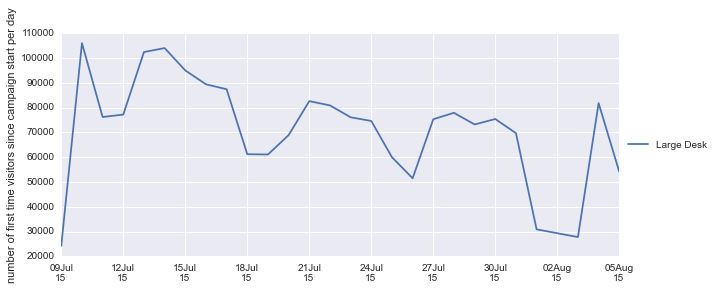

In [9]:
config = {
            'hours' :24, 
            'start': start,
            'ylabel': 'number of first time visitors since campaign start per day'
}

d = plot_by_time(imp, {'Large Desk': dsk_regs['Large Desk']}, **config )

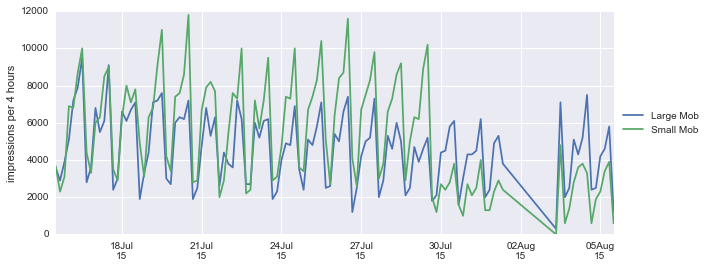

In [10]:
hours = 4
config = {
            'hours' :hours, 
            'start': '2014-12-1 00',
            'ylabel': 'impressions per %d hours' % hours

}
plot_by_time(imp, mob_regs, **config )


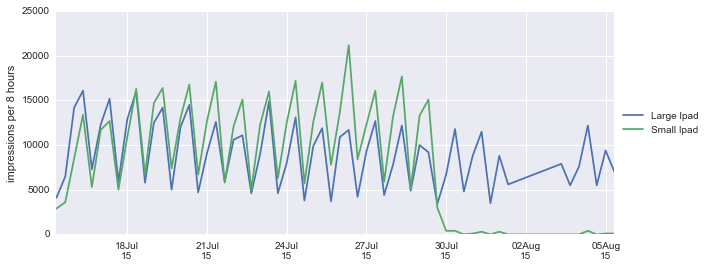

In [11]:

hours = 8
config = {
            'hours' :hours, 
            'ylabel': 'impressions per %d hours' % hours
}
plot_by_time(imp, ipd_regs, **config )

## Donations: Large vs Small By Device 

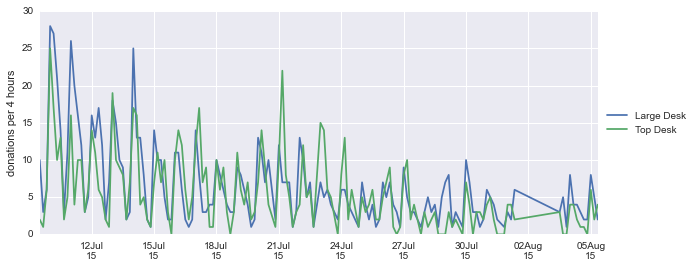

In [12]:
hours = 4
config = {
            'hours' :hours, 
            'ylabel': 'donations per %d hours' % hours
}

plot_by_time(don, dsk_regs, **config)


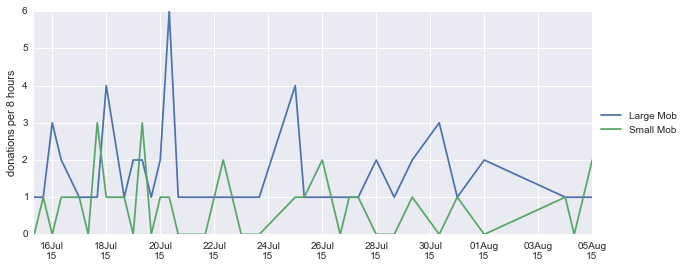

In [13]:
hours = 8
config = {
            'hours' :hours, 
            'ylabel': 'donations per %d hours' %hours
}
plot_by_time(don, mob_regs, **config )


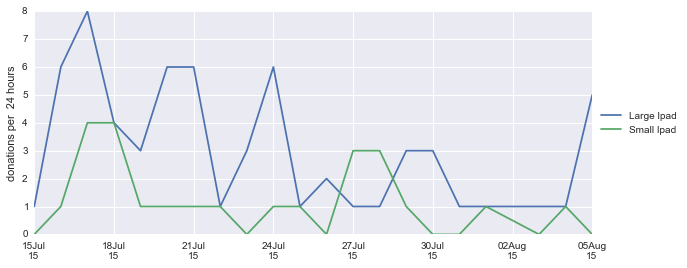

In [14]:
hours = 24
config = {
            'hours' :hours, 
            'start': start,
            'ylabel': 'donations per  %d hours' % hours
}
plot_by_time(don, ipd_regs, **config )



# Donation Rate: Large vs Small By Device

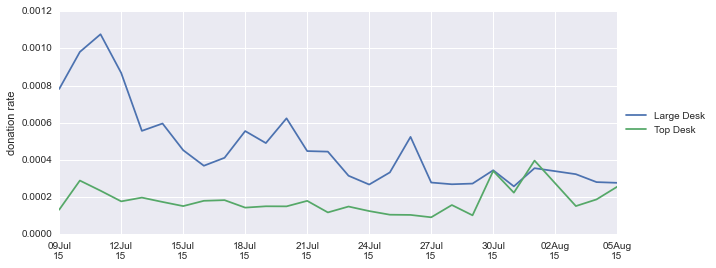

In [15]:
plot_rate_by_time(don, imp, dsk_regs, hours = 24)

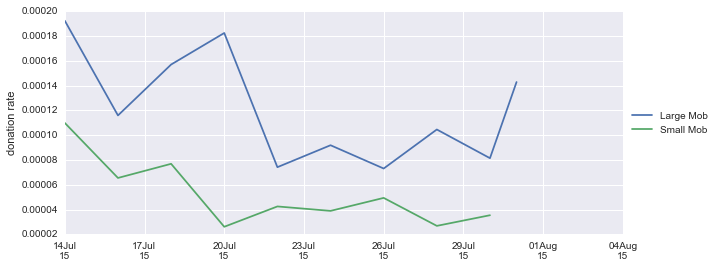

In [16]:
plot_rate_by_time(don, imp, mob_regs, hours = 48 )

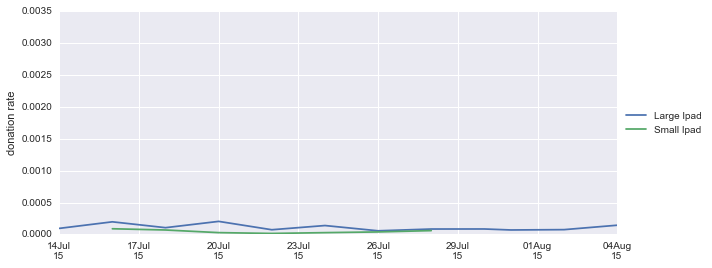

In [17]:
plot_rate_by_time(don, imp, ipd_regs, hours = 48 )

## Large Banner Donation Rate By Device

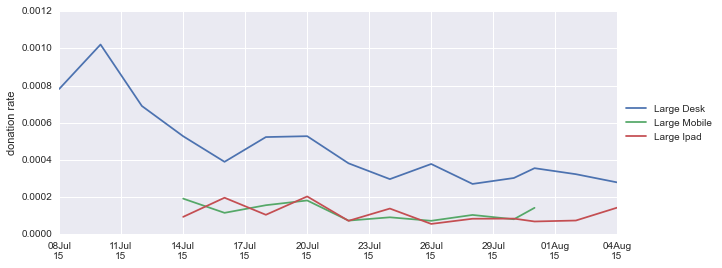

In [18]:
plot_rate_by_time(don, imp, lg_regs, hours = 48 )

## Small Banner Donation Rate By Device

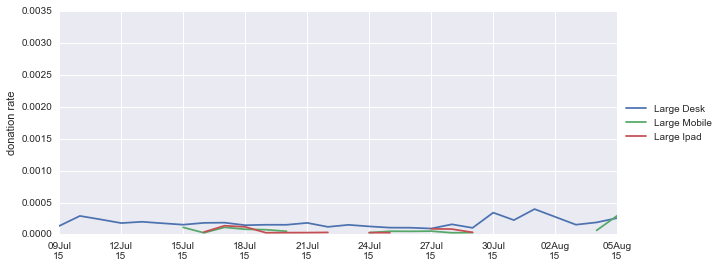

In [19]:
plot_rate_by_time(don, imp, sm_regs, hours = 24 )

## Amount/Day by Banner Size

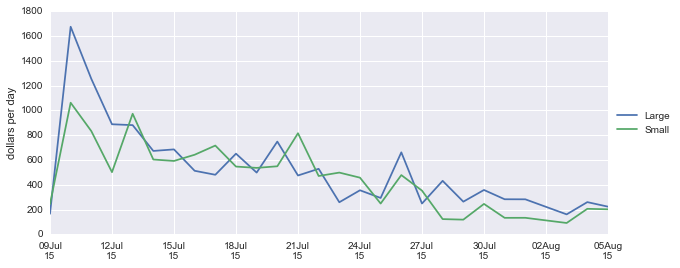

In [20]:
config = {
        'hours' : 24, 
        'amount' : True,
        'ylabel' : 'dollars per day'
}

fig = plot_by_time(don, size_regs, **config )

## Amount/Day by Device

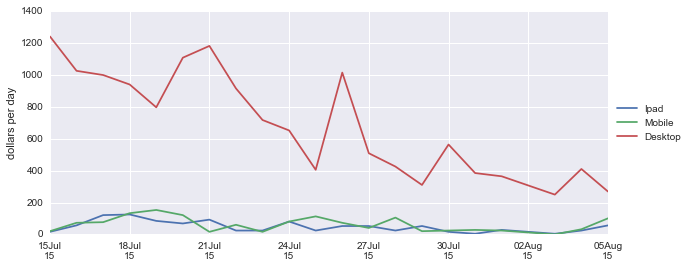

In [21]:
config = {
        'hours' : 24, 
        'amount' : True,
        'start' : '2014-12-3 00',
        'ylabel' : 'dollars per day'
}


fig = plot_by_time(don, device_regs, **config )

## Cumulative Total per Day By Device

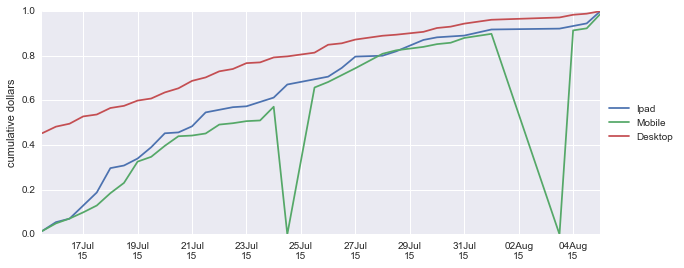

In [22]:
config = {
    'hours': 12,
    'amount': True,
    'cum' : True,
    'ylabel' : 'cumulative dollars',
    'interactive': False,
    'normalize' : True
}

plot_by_time(don, device_regs , **config)


## Quick view of Donation Amount Totals

In [23]:
def get_dollar_break_downs(regs):
    d_totals = pd.DataFrame()
    for name, reg in regs.items():
        counts = don.ix[don.name.str.match(reg).apply(bool)]['amount']
        d_totals[name] = [counts.sum().astype(int)]
    return d_totals

In [24]:
get_dollar_break_downs(all_regs)

,Desktop Large,Desktop Small,Mobile Large,Mobile Small,Ipad Large,Ipad Samll
0,12687,11554,819,492,698,334


In [25]:
get_dollar_break_downs(size_regs)

,Large,Small
0,14205,12381


In [26]:
get_dollar_break_downs(device_regs)

,Ipad,Mobile,Desktop
0,1033,1311,24242


## Quick View of Donation Number totals

In [27]:
def get_donation_number_break_downs(regs):
    d_totals = pd.DataFrame()
    for name, reg in regs.items():
        counts = don.ix[don.name.str.match(reg).apply(bool)]['n']
        d_totals[name] = [counts.sum()]
    return d_totals


In [28]:
get_donation_number_break_downs(all_regs)

,Desktop Large,Desktop Small,Mobile Large,Mobile Small,Ipad Large,Ipad Samll
0,938,808,58,31,64,24


In [29]:
get_donation_number_break_downs(size_regs)

,Large,Small
0,1060,863


In [30]:
get_donation_number_break_downs(device_regs)

,Ipad,Mobile,Desktop
0,88,89,1746


## Quick View of Average Donations

In [31]:
def get_average_donation_break_downs(regs):
    d_totals = pd.DataFrame()
    for name, reg in regs.items():
        counts = don.ix[don.name.str.match(reg).apply(bool)]['n']
        amounts = don.ix[don.name.str.match(reg).apply(bool)]['amount']
        d_totals[name] = ['%.2f' % (amounts.sum() / counts.sum())]
    return d_totals

In [32]:
get_average_donation_break_downs(all_regs)

,Desktop Large,Desktop Small,Mobile Large,Mobile Small,Ipad Large,Ipad Samll
0,13.53,14.30,14.13,15.88,10.91,13.95


In [33]:
get_average_donation_break_downs(size_regs)

,Large,Small
0,13.40,14.35


In [34]:
get_average_donation_break_downs(device_regs)

,Ipad,Mobile,Desktop
0,11.74,14.74,13.88


## Quick View of Impression Number Totals

In [35]:
def get_impression_break_downs(regs):
    d_totals = pd.DataFrame()
    for name, reg in regs.items():
        counts = imp.ix[imp.name.str.match(reg).apply(bool)]['n']
        d_totals[name] = [counts.sum()]
    return d_totals

In [36]:
get_impression_break_downs(all_regs)

,Desktop Large,Desktop Small,Mobile Large,Mobile Small,Ipad Large,Ipad Samll
0,1944900,4862900,532000,611500,529300,494300


In [37]:
get_impression_break_downs(size_regs)

,Large,Small
0,3006200,5968700


In [38]:
get_impression_break_downs(device_regs)

,Ipad,Mobile,Desktop
0,1023600,1143500,6807800


## Quick View of Donation Rates

In [39]:
def get_donation_rate_break_downs(regs):
    d_totals = pd.DataFrame()
    for name, reg in regs.items():
        den = imp.ix[imp.name.str.match(reg).apply(bool)]['n']
        num = don.ix[don.name.str.match(reg).apply(bool)]['n']
        d_totals[name] = ['%.5f' % (num.sum()/den.sum())]
    return d_totals

In [40]:
get_donation_rate_break_downs(all_regs)

,Desktop Large,Desktop Small,Mobile Large,Mobile Small,Ipad Large,Ipad Samll
0,0.00048,0.00017,0.00011,0.00005,0.00012,0.00005


In [41]:
get_donation_rate_break_downs(size_regs)

,Large,Small
0,0.00035,0.00014


In [42]:
get_donation_rate_break_downs(device_regs)

,Ipad,Mobile,Desktop
0,0.00009,0.00008,0.00026


# Conversion Rates by device and processor

In [43]:
conv_dsk = get_conversion_clicks(start, stop, dsk_campaign)
conv_mob = get_conversion_clicks(start, stop, mob_campaign)
conv_ipd = get_conversion_clicks(start, stop, ipd_campaign)

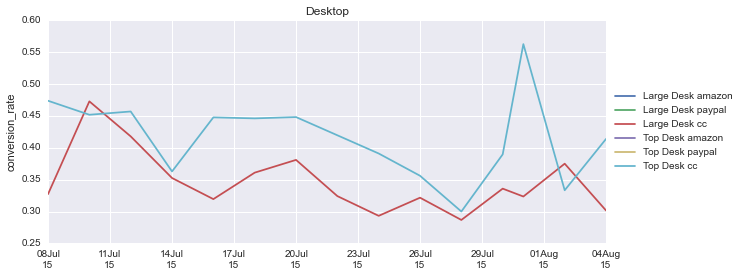

In [44]:
plot_conversion_rate(conv_dsk ,dsk_regs, hours = 48, title = 'Desktop' )

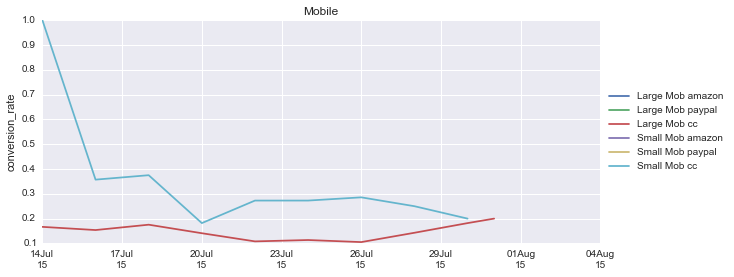

In [45]:
plot_conversion_rate(conv_mob ,mob_regs, hours = 48, title = 'Mobile' )

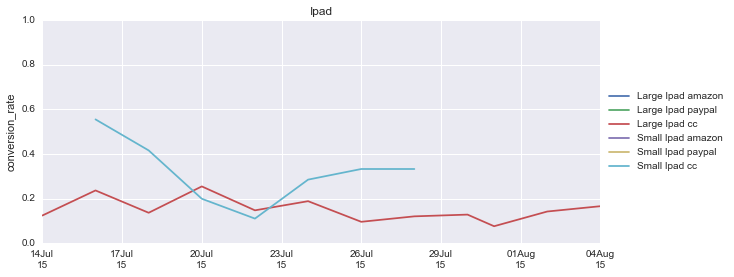

In [46]:
plot_conversion_rate(conv_ipd ,ipd_regs, hours = 48, title = 'Ipad' )